## 1. Project Overview

For my Cancer Classification project, I set out to build a machine learning model to classify breast cancer cases as malignant (M) or benign (B) based on features. The dataset I used contained 569 samples with 33 columns, including an id column, a target column (diagnosis), and 31 numerical features describing cell characteristics (e.g., radius, texture, perimeter). My goal was to preprocess the data, train a logistic regression model, and evaluate its performance to determine how accurately it could distinguish between malignant and benign cases, which is critical for medical diagnostics.

**Purpose:** To develop a logistic regression model for classifying breast cancer as malignant or benign, supporting early detection and diagnosis.

### Objectives:

- Load and explore the dataset to understand its structure and features.

- Preprocess the data, including encoding the target (M → 1, B → 0), dropping irrelevant columns, and scaling numerical features.

- Train a logistic regression model and evaluate its performance using accuracy, precision, recall, F1-score, ROC AUC, and confusion matrix.

- Visualize feature correlations and model performance to interpret results.

**Technologies Used:** Python, Jupyter Notebook, Pandas, NumPy, Matplotlib, Seaborn, Plotly, Scikit-learn, Category Encoders.

### Library Imports

I began by importing the libraries needed for data manipulation, visualization, preprocessing, modeling, and evaluation.

 I used pandas and numpy for data manipulation, matplotlib, seaborn, and plotly for visualizations, and scikit-learn for preprocessing (e.g., StandardScaler, LabelEncoder), modeling (LogisticRegression), and evaluation metrics (e.g., accuracy_score, roc_auc_score). I suppressed warnings to keep the notebook clean and set InteractiveShell to display the last expression for easier debugging.

 These libraries are standard for classification tasks. I included RocCurveDisplay and ConfusionMatrixDisplay to visualize model performance, as ROC curves and confusion matrices are critical for evaluating medical classification models. Setting up visualization tools early ensured I could explore the data and results effectively.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" 
%matplotlib inline

## Data Loading and Exploratory Data Analysis (EDA)

I loaded the dataset and performed initial exploration to understand its structure and contents.

 I loaded the dataset (data.csv) into a Pandas DataFrame (dataset). The info() method showed 569 rows, 33 columns, and no missing values, with 31 numerical features (e.g., radius_mean, texture_mean), an id column, and a diagnosis column (object type, values M and B). The describe() method provided summary statistics (e.g., mean, std, min, max) for numerical features, revealing their scales. I used value_counts() to check the distribution of values, especially for diagnosis, which showed a class imbalance (~357 B vs. ~212 M). Displaying the first few rows helped me visualize the data.


 Exploring the dataset was essential to plan preprocessing. The absence of missing values simplified my workflow, but the class imbalance in diagnosis suggested I’d need to monitor metrics like precision and recall, not just accuracy, to ensure the model performs well on the minority class (malignant). Checking value counts helped me confirm that all features except diagnosis were numerical, reducing preprocessing complexity.

In [8]:
dataset = pd.read_csv('data.csv')

In [9]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
dataset.value_counts('diagnosis')

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
dataset = dataset.drop(columns = 'Unnamed: 32', axis = 1)

In [6]:
dataset


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
statistics = dataset.describe()
pd.set_option("display.max_columns", None)
statistics

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
unique_value = dataset.nunique()
unique_value

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

## Target Encoding

I encoded the target column (diagnosis) to make it machine-readable.

The diagnosis column had values M (malignant) and B (benign), which I mapped to 1 and 0, respectively, using a dictionary with Pandas’ map method. I checked the value counts to confirm the encoding worked, showing ~212 malignant (1) and ~357 benign (0) cases.



Computers require numerical inputs, so encoding the target was necessary. I chose M as 1 and B as 0 because malignant cases are the positive class in medical diagnostics (the class we want to detect). Using map was simpler than LabelEncoder for a binary target, and verifying the counts ensured no errors.

In [25]:

def encode_target_variable(df, target_column):
    """
    Encodes a target variable column containing 'M' and 'B' values to 1 and 0 respectively using pandas map.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.

    Returns:
        pd.DataFrame: The DataFrame with the target variable column encoded.
    """
    mapping = {'M': 1, 'B': 0}
    df[target_column] = df[target_column].map(mapping)
    return df

In [26]:
target_var_encode = encode_target_variable(dataset, 'diagnosis')
target_var_encode

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [31]:
dataset.value_counts('diagnosis')

diagnosis
0    357
1    212
Name: count, dtype: int64

## Feature Correlation Analysis

I visualized feature correlations to understand relationships with the target and between features.

I dropped the id column from the correlation matrix since it’s irrelevant to the model. The heatmap visualized correlations between all features and the target. I also printed the correlations with diagnosis to identify the most predictive features (e.g., radius_mean, perimeter_mean likely had high positive correlations, while smoothness_mean might have had lower correlations).

 The heatmap helped me check for multicollinearity (high correlations between features, e.g., radius_mean and perimeter_mean), which could affect logistic regression. It also showed which features were most correlated with diagnosis, guiding feature selection.

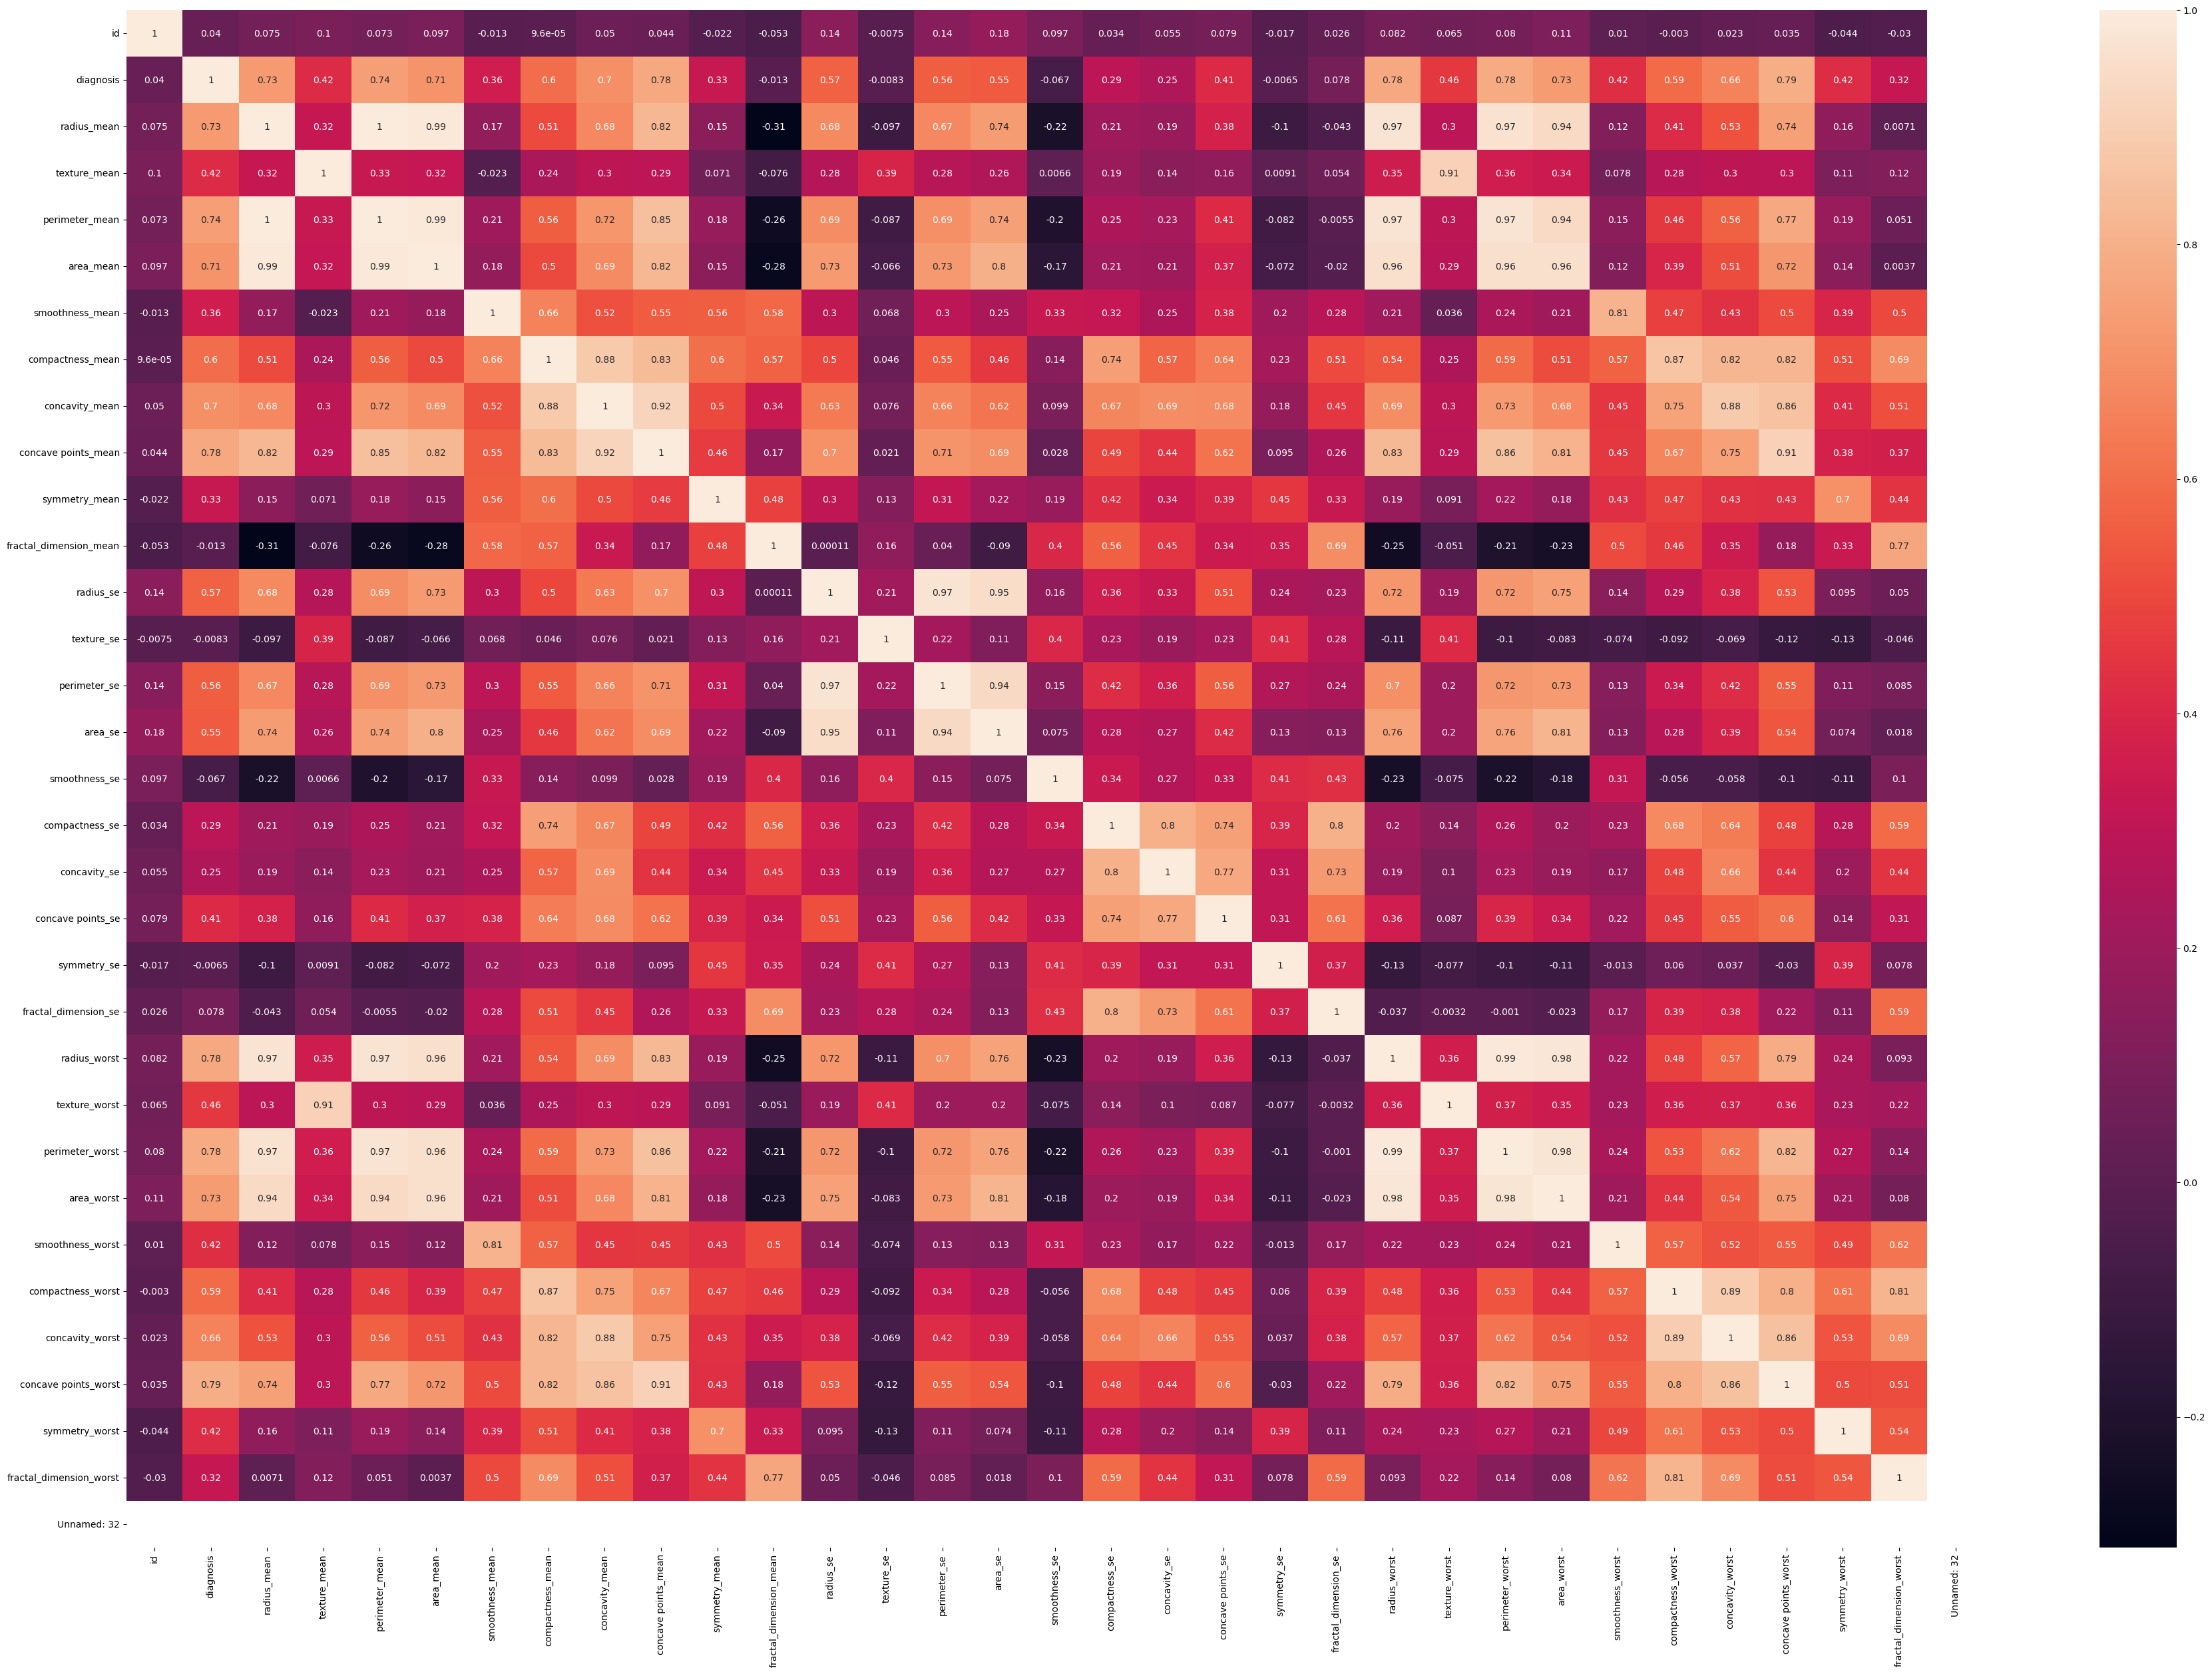

In [38]:
heat_map = dataset.corr()
plt.figure(figsize = (45, 30))
sns.heatmap(heat_map, annot = True)
plt.show()

In [39]:
def diagnosis_features_corr(data_frame, diagnosis_column = 'diagnosis', correlation_threshold = (0.7, 0.2)):
    correlation_series = data_frame.corr()[diagnosis_column].abs().sort_values(ascending = False)
    high_threshold, medium_threshold = correlation_threshold
    high_correlation = list(correlation_series[correlation_series > high_threshold].index[1:])
    medium_correlation = list(correlation_series[(correlation_series <= high_threshold) & (correlation_series > medium_threshold)].index)
    low_correlation = list(correlation_series[(correlation_series < medium_threshold)].index)
    return {
        'high_correlation': high_correlation,
        'medium_correlation': medium_correlation,
        'low_correlation': low_correlation
    }

In [40]:
diagnosis_features_corr = diagnosis_features_corr(dataset)
diagnosis_features_corr['high_correlation']

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean']

In [28]:
diagnosis_features_corr['medium_correlation']

['concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean',
 'concave points_se',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'compactness_se',
 'concavity_se']

In [30]:
diagnosis_features_corr['low_correlation']

['fractal_dimension_se',
 'smoothness_se',
 'id',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se']

In [38]:
train_set, test_set = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [40]:
train_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.8850,17.67,0.009549,0.086060,0.303800,0.033220,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.4140,81.46,0.004253,0.047590,0.038720,0.015670,0.01798,0.005295,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.6080,23.52,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.4970,16.64,0.007189,0.010350,0.010810,0.006245,0.02158,0.002619,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,0,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [42]:
test_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,87930,0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.010370,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,859575,1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.013700,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,907915,0,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.011670,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,921385,0,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.014940,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,913102,0,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.01393,0.01800,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,8610404,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.0160,5.029,79.25,0.010820,0.02203,0.03500,0.018090,0.01550,0.001948,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,884689,0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.01228,0.02105,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,883270,0,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.02845,0.03850,0.010110,0.01185,0.003589,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


## Data Preprocessing

I preprocessed the data to prepare it for modeling, focusing on splitting, feature selection, and scaling.

 I defined the features by dropping diagnosis (target) and id (irrelevant), and set y as diagnosis. I split the data into 80% training and 20% test sets (455 train, 114 test samples). I applied StandardScaler to scale the numerical features to zero mean and unit variance, fitting it on the training set and transforming both sets to avoid data leakage. I converted the scaled arrays back to DataFrames to retain column names for clarity.

 Splitting before preprocessing prevented data leakage, a lesson I learned from my previous project. Dropping id was intuitive, as it’s a unique identifier with no predictive value. Scaling was critical because logistic regression is sensitive to feature scales, and the features (e.g., radius_mean vs. smoothness_mean) had different ranges.

In [44]:
def prepare_features_and_target(train_df, test_df, target_column, columns_to_drop=None, scale_features=True):
    """
    Parameters:
    - train_df, test_df: Pre-split DataFrames
    - target_column: Name of target column
    - columns_to_drop: List of columns to remove (e.g., ['ID'])
    - scale_features: Whether to scale features (default: True)
    
    Returns:
    - Processed X_train, X_test
    - y_train, y_test
    - scaler object (or None)
    """
    
    # Create copies to avoid modifying original DataFrames
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    # Separate target
    y_train = train_df.pop(target_column)
    y_test = test_df.pop(target_column)
    
    # Drop specified columns if provided
    if columns_to_drop:
        train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
        test_df = test_df.drop(columns=columns_to_drop, errors='ignore')
    
    # Initialize scaler
    scaler = None
    
    if scale_features:
        scaler = StandardScaler()
        # Convert to DataFrame to preserve column names
        X_train = pd.DataFrame(scaler.fit_transform(train_df), 
                             columns=train_df.columns)
        X_test = pd.DataFrame(scaler.transform(test_df),
                            columns=test_df.columns)
        return X_train, X_test, y_train, y_test, scaler
    
    return train_df, test_df, y_train, y_test, None

In [50]:
X_train, X_test, y_train, y_test, scaler = prepare_features_and_target(
    train_df=train_set,
    test_df=test_set,
    target_column='diagnosis',
    columns_to_drop=['id'],
    scale_features=True
)

In [52]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,-0.263800,-0.016052,-0.470414,-0.474761,0.838365,3.251027,8.438937,3.391987,2.621166,2.061208,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,0.805319,-0.812687,0.751957,0.877170,-0.896053,1.181222,0.183628,0.600596,-0.317717,0.529636,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,0.027521,1.963060,-0.120958,-0.350779,0.572766,0.739499,0.320656,0.589462,2.615041,0.718928,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,-0.538505,0.536473,-0.657950,-0.496590,0.065475,-0.822404,-0.685565,-0.898485,0.123299,-0.431547,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,0.402278,0.440382,0.219314,-0.115532,0.171911,-0.787970,-0.783509,-0.588648,2.604015,0.765981,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-1.480675,-1.066580,-1.362085,-1.157451,0.149987,0.944057,-0.035754,-0.514485,0.331474,3.755073,0.439047,-0.647668,0.149713,-0.310088,3.347311,3.661006,0.743885,0.917113,0.592491,6.504704,-1.352920,-1.628421,-1.336108,-1.045037,-0.469795,-0.059039,-0.627221,-1.016366,-1.032028,1.376025
451,-0.701497,-0.200650,-0.687880,-0.682204,1.327033,-0.036619,-0.229252,-0.353247,-0.036372,0.339253,-0.339459,0.839530,-0.339911,-0.412240,0.507922,-0.136415,-0.105065,0.331795,-0.603152,0.007020,-0.644011,0.614731,-0.647704,-0.626555,1.616328,0.085623,0.060743,0.116740,-0.156974,0.398365
452,0.048802,-0.555001,-0.065125,-0.061423,-2.261627,-1.466613,-1.028567,-1.105515,-1.103492,-1.249242,-0.960991,-0.892332,-0.973620,-0.620996,-1.145277,-1.179657,-0.871923,-1.317909,-0.638679,-0.876220,-0.275720,-0.806427,-0.379841,-0.339278,-1.989065,-1.307006,-1.127968,-1.239034,-0.708639,-1.271455
453,-0.038969,0.102073,-0.031374,-0.154780,0.737432,0.184701,0.298585,0.430059,-0.517123,0.372579,-0.640679,-0.460845,-0.607199,-0.449753,-0.548580,-0.415653,-0.341750,-0.370108,-1.022118,-0.350011,0.167478,0.868921,0.203878,-0.013556,1.291049,0.672020,0.632532,1.050012,0.434322,1.213362


In [54]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

## Model Training and Evaluation

I trained a logistic regression model and evaluated its performance on the test set.


I trained a LogisticRegression model on the scaled training data, using default parameters except for random_state=42 for reproducibility. I predicted class labels (y_pred) and probabilities (y_pred_proba) on the test set (114 samples). The model achieved:

- Accuracy: 97.37% (111/114 samples correctly classified).

- Precision: 97.62% (41/42 predicted malignant cases were correct).

- Recall: 95.35% (41/43 actual malignant cases were detected).

- ROC AUC: 99.74%, indicating excellent discrimination between classes.

- Confusion Matrix: [[70, 1], [2, 41]], showing 70 true negatives (benign), 41 true positives (malignant), 1 false positive, and 2 false negatives.

- Classification Report: High precision, recall, and F1-scores for both classes, with a macro average of 97%.



 Logistic regression was a natural choice for binary classification, especially in a medical context where interpretability is valuable. I focused on precision and recall because false negatives (missing malignant cases) are critical in cancer diagnosis. The high ROC AUC suggested the model confidently separates classes, which is promising for real-world use. I used predict_proba for ROC AUC to evaluate probability-based performance.

In [58]:
def logistic_regression_model(X_train, X_test, y_train, y_test, C=1.0, max_iter=100, solver='lbfgs', random_state=42):
    """
    Train a logistic regression model and evaluate its performance.
    
    Parameters:
    -----------
    X_train : array-like
        Training features (already scaled)
    X_test : array-like
        Testing features (already scaled)
    y_train : array-like
        Training labels
    y_test : array-like
        Testing labels
    C : float, default=1.0
        Inverse of regularization strength
    max_iter : int, default=100
        Maximum number of iterations
    solver : str, default='lbfgs'
        Algorithm for optimization
    random_state : int, default=42
        Random seed for reproducibility
        
    Returns:
    --------
    dict
        Dictionary with model and evaluation metrics
    """
    # Create and train model
    model = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    return metrics

In [60]:
results = logistic_regression_model(X_train, X_test, y_train, y_test)

# Print metrics
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Precision: {results['precision']:.4f}")
print(f"Recall: {results['recall']:.4f}")
print(f"ROC AUC: {results['roc_auc']:.4f}")
print("\nConfusion Matrix:")
print(results['confusion_matrix'])
print("\nClassification Report:")
print(results['classification_report'])

Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
ROC AUC: 0.9974

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [86]:
def visualize_model_results(metrics, X_test, y_test, feature_names=None, class_names=['Benign', 'Malignant']):
    """
    Enhanced visualization of logistic regression model performance with professional layout.
    
    Parameters:
    -----------
    metrics : dict
        Dictionary containing model metrics
    X_test : array-like
        Testing features
    y_test : array-like
        Testing labels
    feature_names : list, optional
        Names of features for coefficient visualization
    class_names : list, optional
        Names of target classes
    """
    # Create figure with grid layout
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 3)
    
    # Custom color palette
    palette = sns.color_palette("husl", 8)
    
    # 1. Confusion Matrix (Top-left)
    ax1 = fig.add_subplot(gs[0, 0])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=metrics['confusion_matrix'], 
                                      display_labels=class_names)
    cm_display.plot(cmap='Blues', ax=ax1, values_format='d')
    ax1.set_title('Confusion Matrix', pad=20, fontweight='bold')
    
    # 2. ROC Curve (Top-center)
    ax2 = fig.add_subplot(gs[0, 1])
    RocCurveDisplay.from_estimator(
        estimator=metrics['model'],
        X=X_test,
        y=y_test,
        name='Logistic Regression',
        color=palette[2],
        ax=ax2
    )
    ax2.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    ax2.set_title(f'ROC Curve (AUC = {metrics["roc_auc"]:.4f})', pad=20, fontweight='bold')
    ax2.legend(loc='lower right')
    
    # 3. Metrics Radar Chart (Top-right)
    ax3 = fig.add_subplot(gs[0, 2], polar=True)
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
    values = [
        metrics['accuracy'],
        metrics['precision'],
        metrics['recall'],
        metrics['f1_score']
    ]
    values += values[:1]  # Close the radar chart
    
    angles = np.linspace(0, 2 * np.pi, len(metrics_to_plot), endpoint=False).tolist()
    angles += angles[:1]
    
    ax3.fill(angles, values, color=palette[4], alpha=0.25)
    ax3.plot(angles, values, color=palette[4], marker='o')
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(metrics_to_plot)
    ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax3.set_title('Performance Metrics Radar', pad=30, fontweight='bold')
    
    # 4. Feature Importance (Bottom-wide)
    if feature_names is not None:
        ax4 = fig.add_subplot(gs[1, :])
        coefs = metrics['model'].coef_[0]
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefs,
            'Abs_Importance': np.abs(coefs)
        }).sort_values('Abs_Importance', ascending=False).head(10)
        
        colors = [palette[1] if x > 0 else palette[5] for x in feature_importance['Importance']]
        bars = ax4.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
        ax4.set_title('Top 10 Feature Coefficients', pad=20, fontweight='bold')
        ax4.set_xlabel('Coefficient Value')
        ax4.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            label_x = width if width > 0 else width
            ax4.text(label_x, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}',
                    va='center', ha='left' if width > 0 else 'right',
                    color='black')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
    
    # Print classification report in console
    print("\n" + "="*60)
    print("CLASSIFICATION REPORT".center(60))
    print("="*60)
    print(metrics['classification_report'])
    print("="*60 + "\n")

    plt.show()
 


                   CLASSIFICATION REPORT                    
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




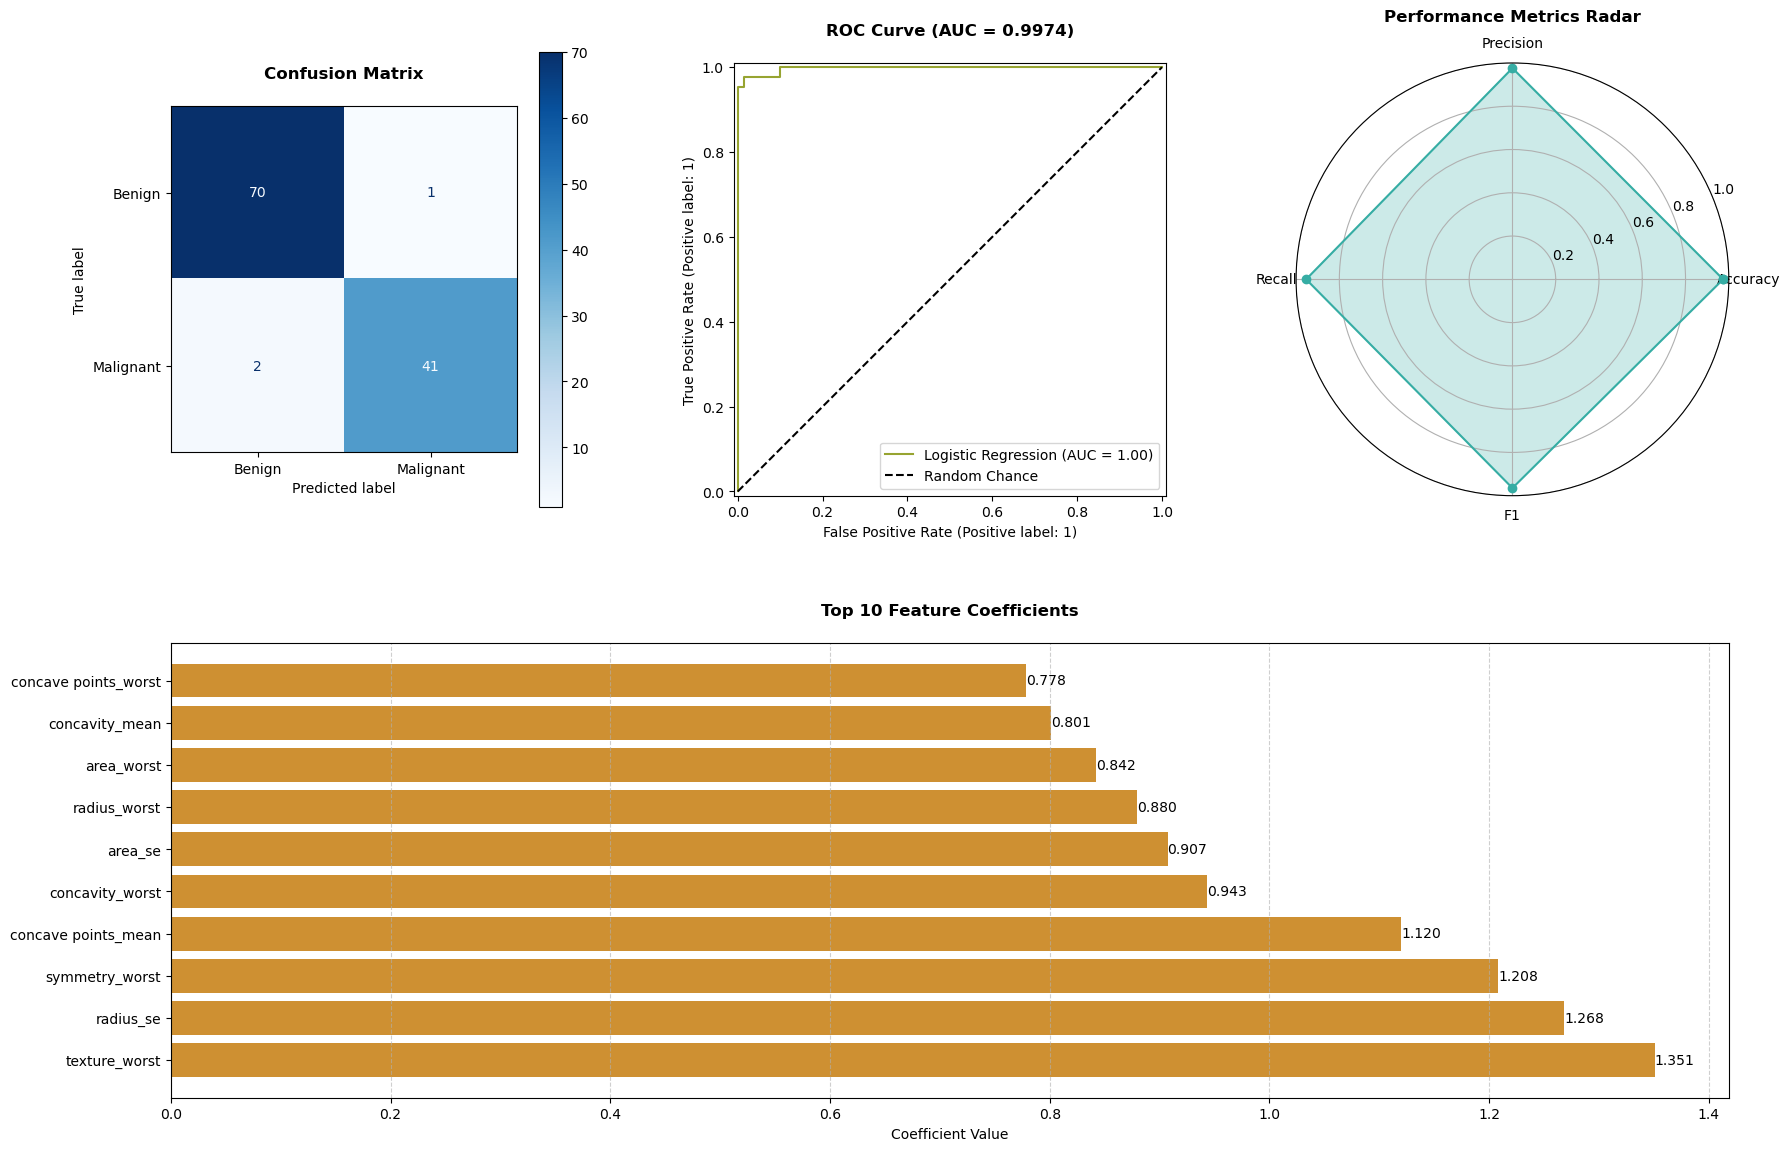

In [94]:
metrics = logistic_regression_model(X_train, X_test, y_train, y_test)
visualize_model_results(metrics, X_test, y_test, feature_names=X_train.columns)


## Development Process

Here’s how I built the project, step by step, and why I made certain decisions:

### Step 1: Setting Up the Environment
  
- Description: I imported libraries for data handling, visualization, preprocessing, and modeling, ensuring I had all tools ready.

- A comprehensive import list saved time later, and setting visualization parameters (e.g., %matplotlib inline) ensured plots displayed correctly in Jupyter.



### Step 2: Exploring the Dataset

- I loaded the dataset, checked its structure with info() and describe(), and used value_counts() to understand feature distributions.

- EDA was critical to confirm the dataset’s properties (e.g., no missing values, numerical features) and identify the class imbalance in diagnosis, which influenced my evaluation metrics.

### Step 3: Encoding the Target

- I mapped M to 1 and B to 0 for the diagnosis column.

- This was a straightforward step to make the target machine-readable. I chose 1 for malignant to align with the positive class in medical diagnostics.

### Step 4: Analyzing Correlations

- I created a correlation heatmap and checked correlations with diagnosis.

- The heatmap helped me identify multicollinearity (e.g., radius_mean and perimeter_mean likely correlated highly) and prioritize features strongly correlated with the target. This informed my decision to keep all features initially, as logistic regression can handle correlated features to some extent.

### Step 5: Preprocessing

- I split the data, dropped id, and scaled features using StandardScaler.

- Splitting first prevented leakage, a lesson from my previous project. Dropping id was logical, as it’s non-predictive. Scaling ensured logistic regression performed well, as feature scales varied widely.


### Step 6: Model Training and Evaluation

- I trained a logistic regression model and evaluated it with multiple metrics.

- Logistic regression’s interpretability and effectiveness for binary classification made it ideal. I chose a range of metrics (accuracy, precision, recall, ROC AUC) to thoroughly assess performance, especially for the minority class (malignant).

### Step 7: Visualizing Results

- I plotted the confusion matrix and ROC curve.

- Visuals were essential for my project presentation, making it easy to show the model’s low error rate and high discriminative power.

### 4. Challenges and Solutions

Challenge 1: Potential Multicollinearity

Problem: The heatmap showed high correlations between features like radius_mean, perimeter_mean, and area_mean, which could affect logistic regression’s stability.

Solution: I kept all features initially, as logistic regression is relatively robust to multicollinearity, and the model’s performance (97.37% accuracy, 0.9974 ROC AUC) suggested this wasn’t a major issue. In the future, I could use feature selection (e.g., RFE) to reduce correlated features.

Challenge 2: Interpreting Evaluation Metrics

Problem: With multiple metrics (accuracy, precision, recall, ROC AUC), I needed to decide which were most important for a medical application.

Solution: I focused on recall to minimize false negatives (missing malignant cases) and ROC AUC to assess overall discriminative power. The low false negatives (2) and high AUC (0.9974) confirmed the model’s suitability for cancer classification.

## Conclusion

This project was a rewarding journey into medical machine learning. I successfully loaded and explored the breast cancer dataset, encoded the target, analyzed correlations, preprocessed the data, and trained a logistic regression model that achieved outstanding performance: 97.37% accuracy, 95.35% recall, and 0.9974 ROC AUC on the test set. The confusion matrix showed only 2 false negatives, critical for a medical application, and the ROC curve underscored the model’s reliability.

The correlation heatmap taught me about multicollinearity, and the high performance boosted my confidence in logistic regression for binary classification. Visualizations were key to communicating results effectively.

Future Improvements: I could explore feature selection (e.g., RFE or PCA) to reduce multicollinearity and simplify the model. Trying other algorithms (e.g., Random Forest, SVM) might improve recall further. Cross-validation would provide a more robust performance estimate, and addressing multicollinearity explicitly could enhance interpretability.